# Исследование зависимости плотности от параметров НСВ в Python

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.style.use("default")

# Вспомогательная функция для отрисовки плотности
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1
    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim((-0.05, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()

## Равномерное непрерывное распределние

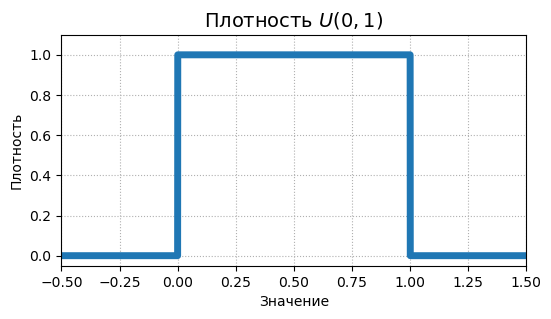

In [2]:
show_pdf(pdf=sts.uniform.pdf, xmin=-0.5, xmax=1.5, grid_size=10000,
         distr_name=r'$U(0, 1)$', loc=0, scale=1
)

In [3]:
# виджеты
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.uniform.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
    value=100, description='$grid\_size$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1,
    value=1, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1,
    value=10, description='$x_{max}=$'),
    loc=widgets.FloatSlider(min=1, max=15, step=0.1,
    value=3, description='$a=$'),
    scale=widgets.FloatSlider(min=0.5, max=10, step=0.01,
    value=1, description='$b - a=$'),
    distr_name=r'$U$({loc:.2f}, {loc:.2f} + {scale:.2f})',
);
# Создание слайдеров
display(widgets.VBox(ip.children[:2] + ip.children[4:]))
ip.update()

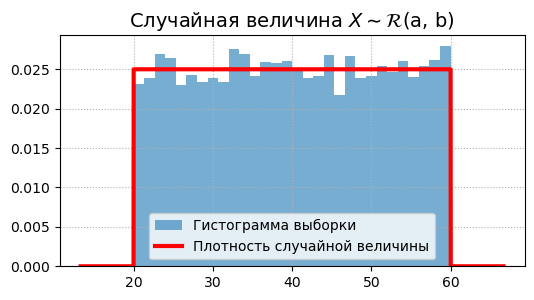

Математическое ожидание: 40.148, a по формуле: 40.0
Дисперсия: 133.727, a по формуле: 133.333


In [4]:
def plot_uniform(a=0, b=1, n_points=1000):
    plt.figure(figsize=(6, 3))
    sample = sts.uniform.rvs(loc=a, scale=b-a, size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(a-(b-a)/6, b + (b-a)/6 , n_points)
    plt.plot(grid, sts.uniform.pdf(grid, a, b-a), color='red', lw=3, label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim \mathcal{R}$(а, b)', fontsize=14)
    plt.legend(fontsize=10, loc=8)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, a по формуле: {round((a + b)/ 2, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, a по формуле: {round((b - a) ** 2/ 12, 3)}')

plot_uniform(20, 60, 10000)

## Экспоненциальное распределение

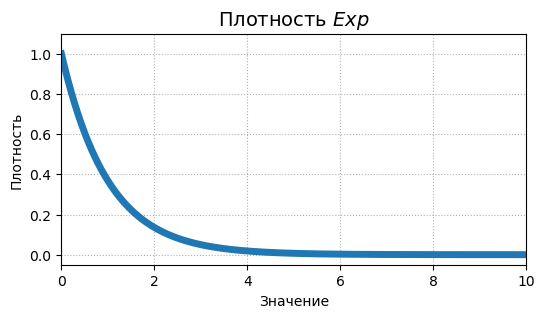

In [5]:
show_pdf(
    pdf=sts.expon.pdf, xmin=0, xmax=10, grid_size=10000,
    distr_name=r'$Exp$', scale=1
)

In [6]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.expon.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
                               value=100, description='$grid\\_size$'),
    xmin=widgets.FloatSlider(min=0, max=20, step=0.1,
                            value=0, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1,
                            value=10, description='$x_{max}=$'),
    scale=widgets.FloatSlider(min=0, max=5, step=0.1,
                             value=1, description='$1 / \lambda=$'),
    distr_name=r'$Exp$({scale:.2f})',
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()


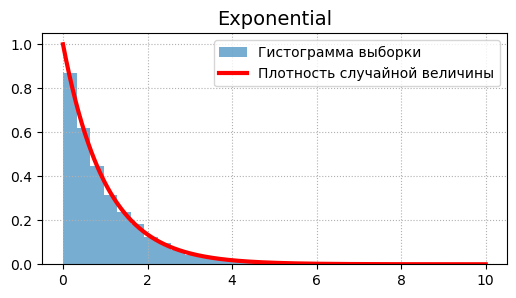

Математическое ожидание: 1.0, а по формуле: 1
Дисперсия: 1.0, а по формуле: 1.0


In [7]:
def plot_exp(lmbd=1, n_points=10000):
    plt.figure(figsize=(6, 3))  # задаём размер фигуры

    # Генерируем выборку случайных значений, распределённых по экспоненциальному закону
    sample = sts.expon.rvs(scale=1/lmbd, size=n_points)

    # Строим гистограмму выборки
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')

    # Создаём сетку значений для построения графика плотности
    grid = np.linspace(0, 10, n_points)

    # Рисуем график плотности случайной величины (красная линия)
    plt.plot(grid, sts.expon.pdf(grid, scale=1/lmbd), 
             color='red', lw=3, label='Плотность случайной величины')

    # Добавляем заголовок, легенду и сетку
    plt.title(r'Exponential', fontsize=14)
    plt.legend(fontsize=10, loc=0)
    plt.grid(ls=':')

    # Отображаем график
    plt.show()

    # Вычисляем и выводим математическое ожидание (среднее значение выборки) и дисперсию
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(lmbd, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(1/lmbd**2, 3)}')
plot_exp()

## Нормальное распределение

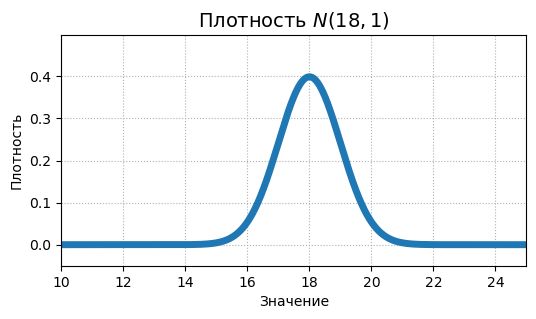

In [8]:
show_pdf(
    pdf=sts.norm.pdf, xmin=10, xmax=25, grid_size=10000, distr_name=r'$N(18, 1)$', loc=18, scale=1)

In [9]:
# виджет
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.norm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
                               value=100, description='$grid\\_size$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1,
                            value=0, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=5, max=25, step=0.1,
                            value=15, description='$x_{max}=$'),
    loc=widgets.FloatSlider(min=-1, max=25, step=0.1,
                           value=10, description='$a=$'),
    scale=widgets.FloatSlider(min=0.01, max=10, step=0.01,
                             value=1, description='$\sigma=$'),
    distr_name=r'$N$({loc:.2f}, {scale:.2f})'
);

# создание слайдеров
display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()


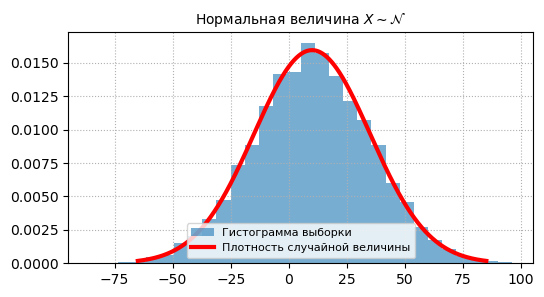

Математическое ожидание: 10.163, а по формуле: 10
Дисперсия: 634.805, а по формуле: 625


In [10]:
def plot_norm(a=0, sigma=1, n_points=10000):
    plt.figure(figsize=(6, 3))  # задаём размер фигуры

    # генерация выборки размера n_points
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n_points)

    # строим гистограмму выборки
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')

    # создаём сетку значений для построения графика плотности
    grid = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)

    # рисуем график плотности случайной величины (красная линия)
    plt.plot(grid, sts.norm.pdf(grid, a, sigma), 
             color='red', lw=3, label='Плотность случайной величины')

    # добавляем заголовок, легенду и сетку
    plt.title(r'Нормальная величина $X \sim \mathcal{N}$', fontsize=10)
    plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')

    # отображаем график
    plt.show()

    # вычисляем и выводим математическое ожидание и дисперсию
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(a, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(sigma ** 2, 3)}')
plot_norm(10, 25)

## Распределение χ²

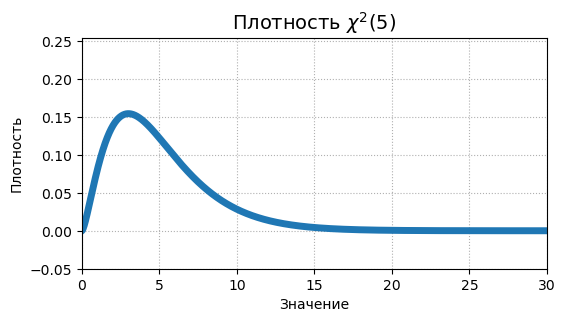

In [11]:
show_pdf(pdf=sts.chi2.pdf, xmin=0, xmax=30, grid_size=10000, distr_name=r'$\chi^2(5)$', df=5)

In [12]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.chi2.pdf),
    grid_size=widgets.IntSlider(
        min=25, max=300, step=25,
        value=100, description='$grid\\_size$'
    ),
    xmin=widgets.FloatSlider(
        min=0, max=10, step=0.1,
        value=0, description='$x_{min}=$'
    ),
    xmax=widgets.FloatSlider(
        min=5, max=50, step=0.5,
        value=30, description='$x_{max}=$'
    ),
    df=widgets.IntSlider(
        min=1, max=30, step=1,
        value=5, description=r'$\nu=$'
    ),
    distr_name=r'$\chi^2$({df})'
)
# создание слайдеров
display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()

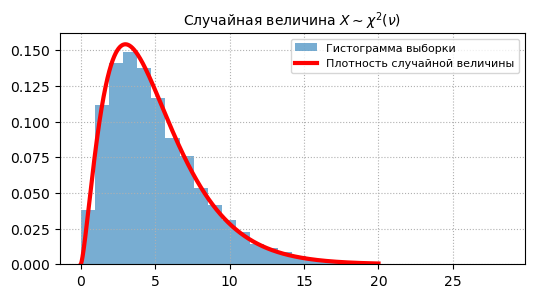

Математическое ожидание: 5.061, а по формуле: 5
Дисперсия: 10.346, а по формуле: 10


In [13]:
def plot_chi2(nu=5, n_points=10000):
    plt.figure(figsize=(6, 3))

    # генерация выборки 
    sample = sts.chi2.rvs(df=nu, size=n_points)


    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')

    grid = np.linspace(0, nu * 4, n_points)

    # рисуем график плотности случайной величины
    plt.plot(
        grid,
        sts.chi2.pdf(grid, df=nu),
        color='red', lw=3, label='Плотность случайной величины'
    )

    plt.title(r'Случайная величина $X \sim \chi^2(\nu)$', fontsize=10)
    plt.legend(fontsize=8, loc=1)
    plt.grid(ls=':')

    plt.show()

    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(nu, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(2 * nu, 3)}')
plot_chi2(5, 10000)